<a href="https://colab.research.google.com/github/nrohrbach/Strahlung_Barchart/blob/main/Strahlung_Barchart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import fiona
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

In [59]:
dfNeigung0 = gpd.read_file('Einstrahlung_Neigung_0.gpkg')

In [60]:
dfNeigung0

,RasterID,x,y,Globalstrahlung_Jahressumme_kWhm2,Globalstrahlung_Wintersumme_kWhm2,Globalstrahlung_Januar_kWhm2,Globalstrahlung_Februar_kWhm2,Globalstrahlung_Maerz_kWhm2,Globalstrahlung_April_kWhm2,Globalstrahlung_Mai_kWhm2,...,PVProduktion_April_kWhkWp,PVProduktion_Mai_kWhkWp,PVProduktion_Juni_kWhkWp,PVProduktion_Juli_kWhkWp,PVProduktion_August_kWhkWp,PVProduktion_September_kWhkWp,PVProduktion_Oktober_kWhkWp,PVProduktion_November_kWhkWp,PVProduktion_Dezember_kWhkWp,geometry
0,2586125_1189575,2586125,1189575,1285,332,35,56,102,139,164,...,111,128,141,140,120,91,60,33,28,"POLYGON ((2586100.000 1189550.000, 2586150.000..."
1,2586175_1189575,2586175,1189575,1275,323,33,54,102,139,164,...,111,128,141,140,120,91,58,35,27,"POLYGON ((2586150.000 1189550.000, 2586200.000..."
2,2586225_1189575,2586225,1189575,1273,320,31,55,102,139,164,...,111,128,141,140,120,92,59,29,23,"POLYGON ((2586200.000 1189550.000, 2586250.000..."
3,2586275_1189575,2586275,1189575,1284,330,34,56,102,139,164,...,111,128,140,140,120,92,57,37,26,"POLYGON ((2586250.000 1189550.000, 2586300.000..."
4,2586325_1189575,2586325,1189575,1268,318,31,53,102,138,164,...,110,128,139,141,121,91,58,31,27,"POLYGON ((2586300.000 1189550.000, 2586350.000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,2588275_1188225,2588275,1188225,1285,337,37,57,103,139,163,...,111,126,138,139,119,90,59,35,27,"POLYGON ((2588250.000 1188200.000, 2588300.000..."
1340,2588325_1188225,2588325,1188225,1279,333,35,56,103,139,162,...,112,127,139,138,118,91,60,36,26,"POLYGON ((2588300.000 1188200.000, 2588350.000..."
1341,2588375_1188225,2588375,1188225,1281,333,35,56,103,139,163,...,112,127,139,138,119,90,57,37,29,"POLYGON ((2588350.000 1188200.000, 2588400.000..."
1342,2588425_1188225,2588425,1188225,1283,335,36,57,103,139,163,...,111,128,139,138,120,91,59,35,26,"POLYGON ((2588400.000 1188200.000, 2588450.000..."


In [101]:
dfNeigung0.loc[1, 'Globalstrahlung_Jahressumme_kWhm2']

1275

In [65]:
dfTest = dfNeigung0[dfNeigung0.RasterID.str.startswith('2586125')]

In [68]:
dfTest

,RasterID,x,y,Globalstrahlung_Jahressumme_kWhm2,Globalstrahlung_Wintersumme_kWhm2,Globalstrahlung_Januar_kWhm2,Globalstrahlung_Februar_kWhm2,Globalstrahlung_Maerz_kWhm2,Globalstrahlung_April_kWhm2,Globalstrahlung_Mai_kWhm2,...,PVProduktion_April_kWhkWp,PVProduktion_Mai_kWhkWp,PVProduktion_Juni_kWhkWp,PVProduktion_Juli_kWhkWp,PVProduktion_August_kWhkWp,PVProduktion_September_kWhkWp,PVProduktion_Oktober_kWhkWp,PVProduktion_November_kWhkWp,PVProduktion_Dezember_kWhkWp,geometry
0,2586125_1189575,2586125,1189575,1285,332,35,56,102,139,164,...,111,128,141,140,120,91,60,33,28,"POLYGON ((2586100.000 1189550.000, 2586150.000..."
48,2586125_1189525,2586125,1189525,1283,330,35,56,102,139,164,...,111,128,140,140,120,92,58,34,26,"POLYGON ((2586100.000 1189500.000, 2586150.000..."
96,2586125_1189475,2586125,1189475,1284,331,35,56,102,139,164,...,111,127,141,140,120,91,59,35,27,"POLYGON ((2586100.000 1189450.000, 2586150.000..."
144,2586125_1189425,2586125,1189425,1289,335,36,57,103,139,164,...,111,128,141,141,120,92,61,38,27,"POLYGON ((2586100.000 1189400.000, 2586150.000..."
192,2586125_1189375,2586125,1189375,1289,335,36,57,103,139,164,...,111,128,141,140,120,91,60,33,28,"POLYGON ((2586100.000 1189350.000, 2586150.000..."
240,2586125_1189325,2586125,1189325,1289,335,36,57,103,139,164,...,111,128,141,140,121,91,63,32,29,"POLYGON ((2586100.000 1189300.000, 2586150.000..."
288,2586125_1189275,2586125,1189275,1290,336,36,57,103,139,164,...,111,128,141,140,121,91,63,33,29,"POLYGON ((2586100.000 1189250.000, 2586150.000..."
336,2586125_1189225,2586125,1189225,1286,334,36,57,102,138,164,...,111,128,140,140,121,91,59,34,29,"POLYGON ((2586100.000 1189200.000, 2586150.000..."
384,2586125_1189175,2586125,1189175,1288,335,36,57,103,139,164,...,112,129,140,140,120,91,59,36,26,"POLYGON ((2586100.000 1189150.000, 2586150.000..."
432,2586125_1189125,2586125,1189125,1289,335,36,57,103,139,164,...,112,129,140,140,120,91,59,38,28,"POLYGON ((2586100.000 1189100.000, 2586150.000..."


In [66]:
#Fill array names. Add new year
names = []
names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [94]:
i = 0

In [106]:
dfTest.reset_index(inplace=True, drop=True)
dfTest

,RasterID,x,y,Globalstrahlung_Jahressumme_kWhm2,Globalstrahlung_Wintersumme_kWhm2,Globalstrahlung_Januar_kWhm2,Globalstrahlung_Februar_kWhm2,Globalstrahlung_Maerz_kWhm2,Globalstrahlung_April_kWhm2,Globalstrahlung_Mai_kWhm2,...,PVProduktion_April_kWhkWp,PVProduktion_Mai_kWhkWp,PVProduktion_Juni_kWhkWp,PVProduktion_Juli_kWhkWp,PVProduktion_August_kWhkWp,PVProduktion_September_kWhkWp,PVProduktion_Oktober_kWhkWp,PVProduktion_November_kWhkWp,PVProduktion_Dezember_kWhkWp,geometry
0,2586125_1189575,2586125,1189575,1285,332,35,56,102,139,164,...,111,128,141,140,120,91,60,33,28,"POLYGON ((2586100.000 1189550.000, 2586150.000..."
1,2586125_1189525,2586125,1189525,1283,330,35,56,102,139,164,...,111,128,140,140,120,92,58,34,26,"POLYGON ((2586100.000 1189500.000, 2586150.000..."
2,2586125_1189475,2586125,1189475,1284,331,35,56,102,139,164,...,111,127,141,140,120,91,59,35,27,"POLYGON ((2586100.000 1189450.000, 2586150.000..."
3,2586125_1189425,2586125,1189425,1289,335,36,57,103,139,164,...,111,128,141,141,120,92,61,38,27,"POLYGON ((2586100.000 1189400.000, 2586150.000..."
4,2586125_1189375,2586125,1189375,1289,335,36,57,103,139,164,...,111,128,141,140,120,91,60,33,28,"POLYGON ((2586100.000 1189350.000, 2586150.000..."
5,2586125_1189325,2586125,1189325,1289,335,36,57,103,139,164,...,111,128,141,140,121,91,63,32,29,"POLYGON ((2586100.000 1189300.000, 2586150.000..."
6,2586125_1189275,2586125,1189275,1290,336,36,57,103,139,164,...,111,128,141,140,121,91,63,33,29,"POLYGON ((2586100.000 1189250.000, 2586150.000..."
7,2586125_1189225,2586125,1189225,1286,334,36,57,102,138,164,...,111,128,140,140,121,91,59,34,29,"POLYGON ((2586100.000 1189200.000, 2586150.000..."
8,2586125_1189175,2586125,1189175,1288,335,36,57,103,139,164,...,112,129,140,140,120,91,59,36,26,"POLYGON ((2586100.000 1189150.000, 2586150.000..."
9,2586125_1189125,2586125,1189125,1289,335,36,57,103,139,164,...,112,129,140,140,120,91,59,38,28,"POLYGON ((2586100.000 1189100.000, 2586150.000..."


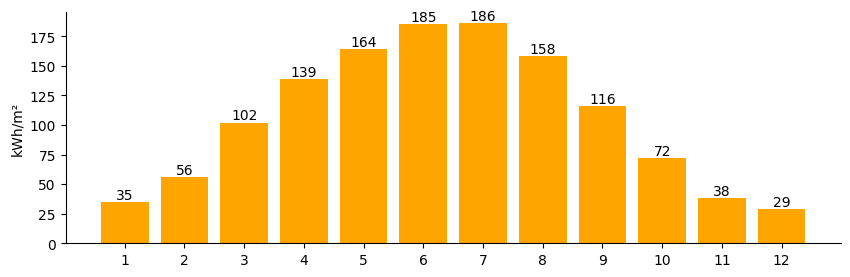

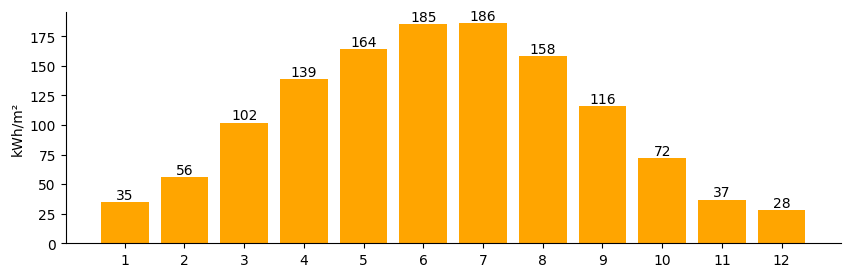

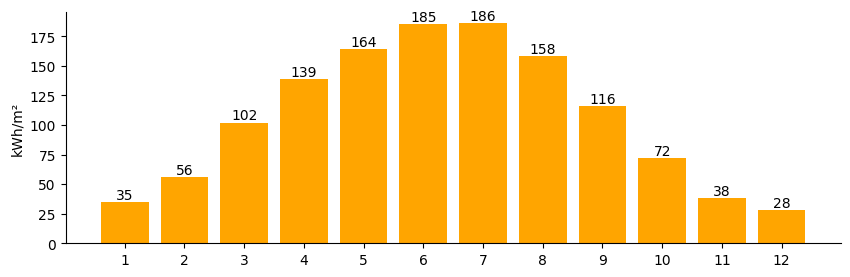

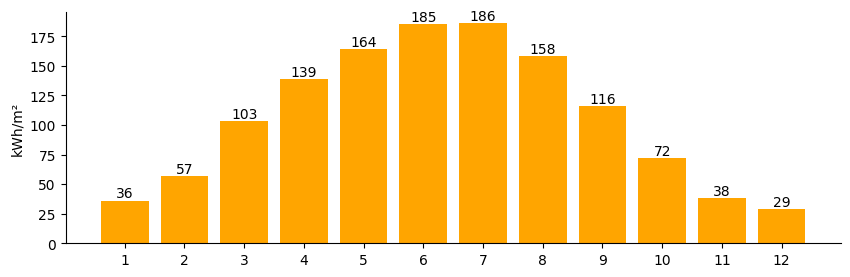

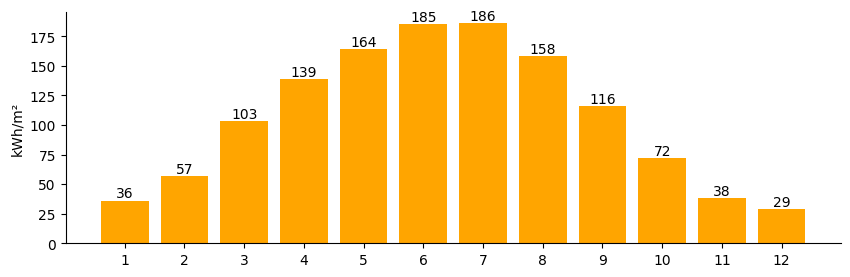

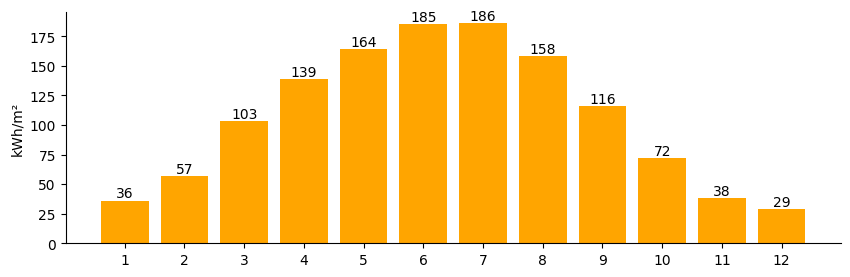

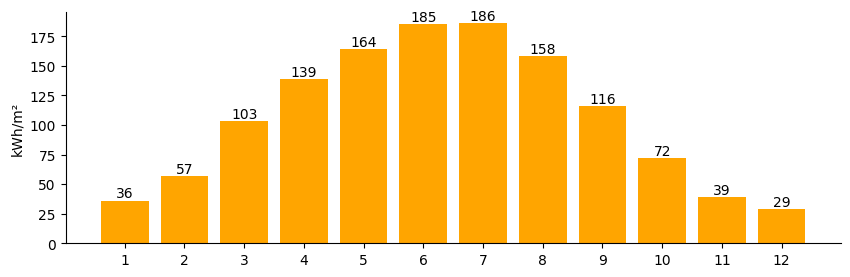

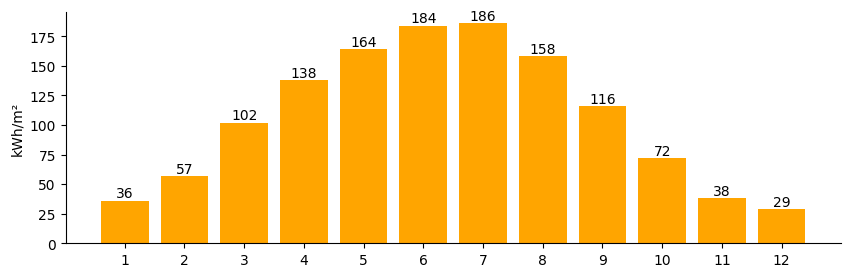

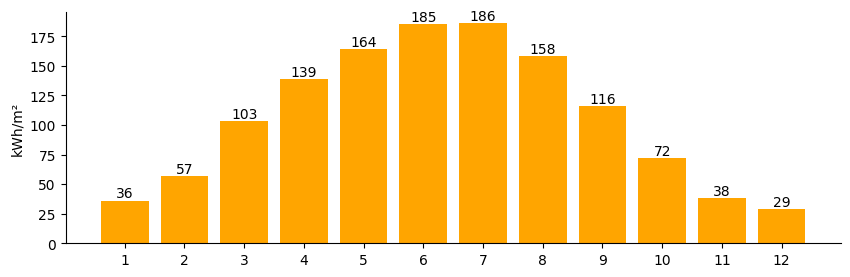

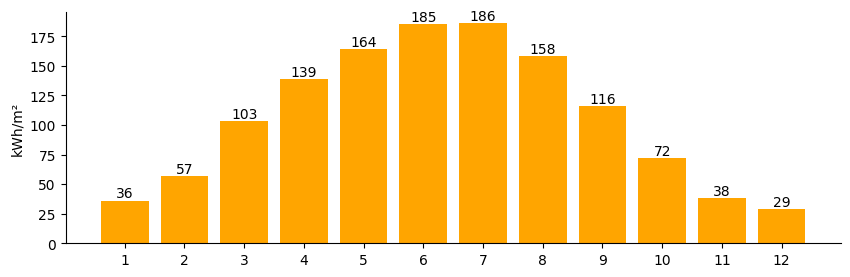

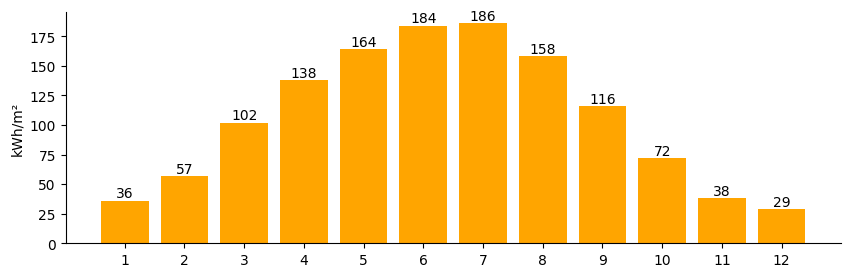

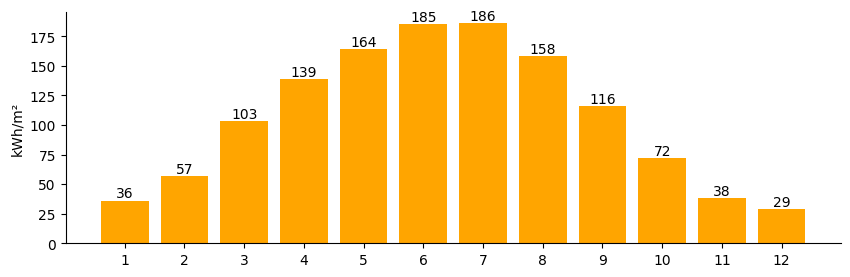

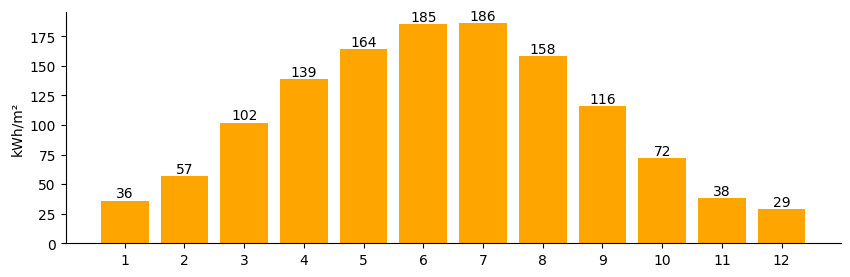

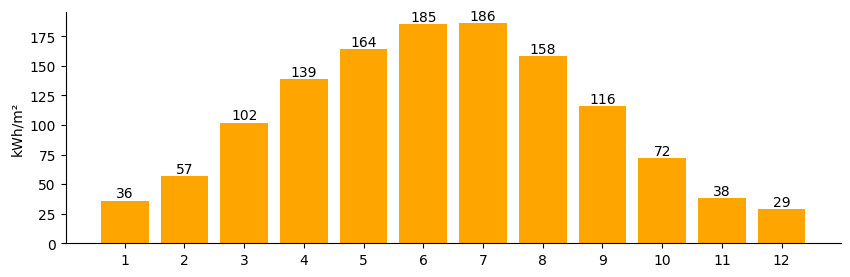

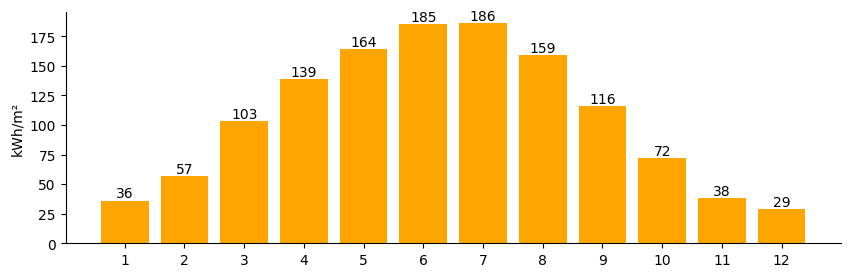

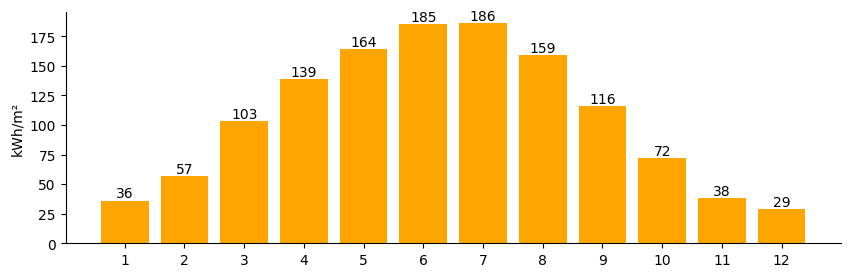

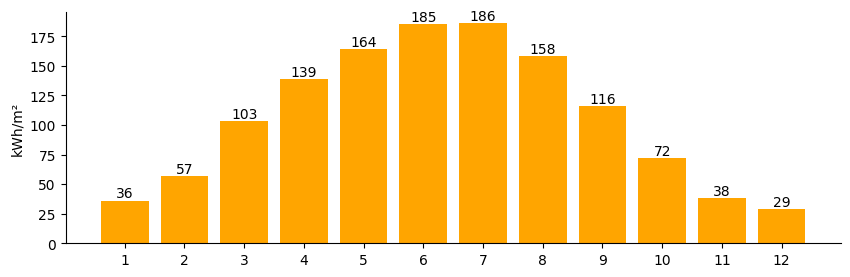

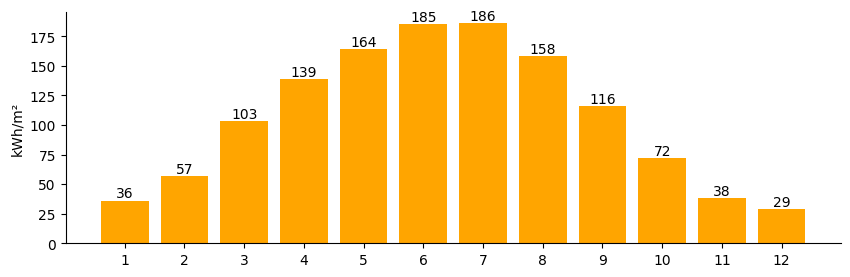

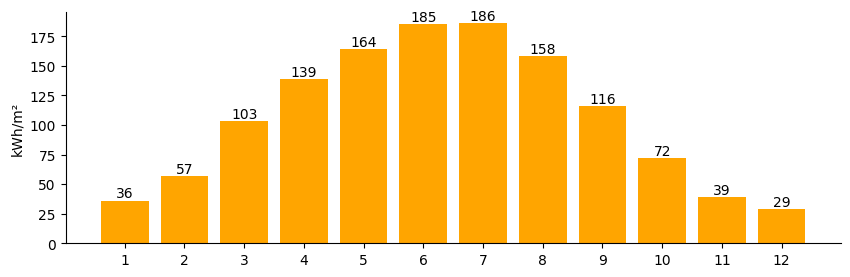

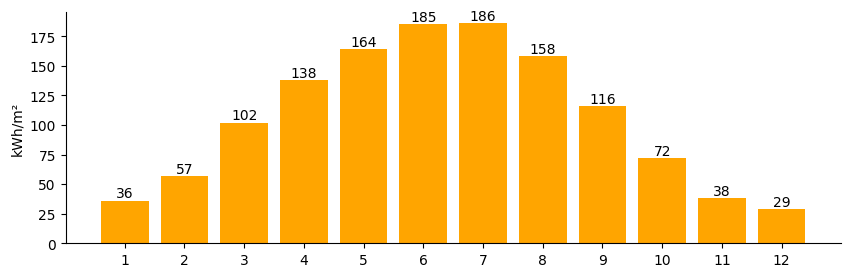

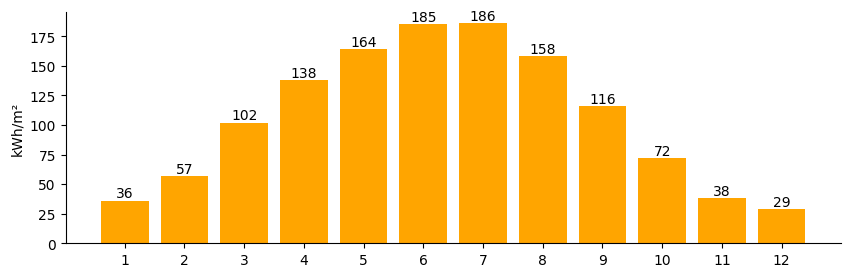

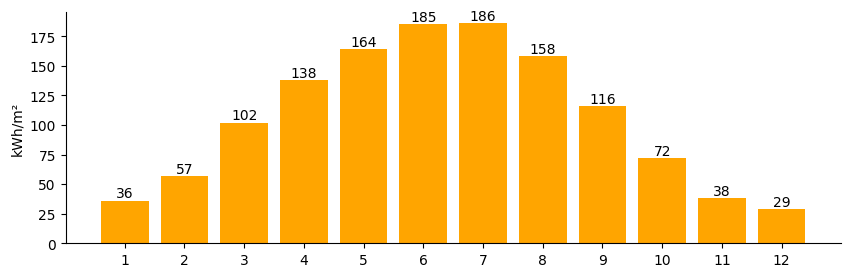

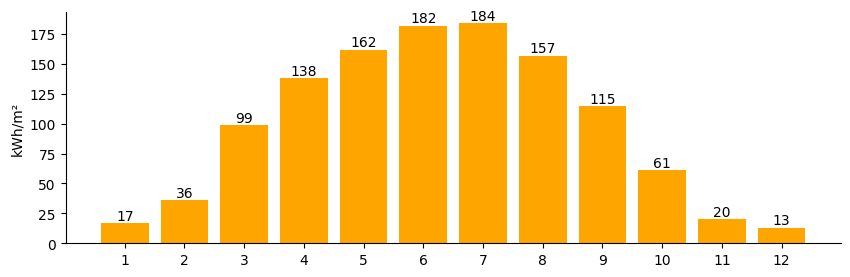

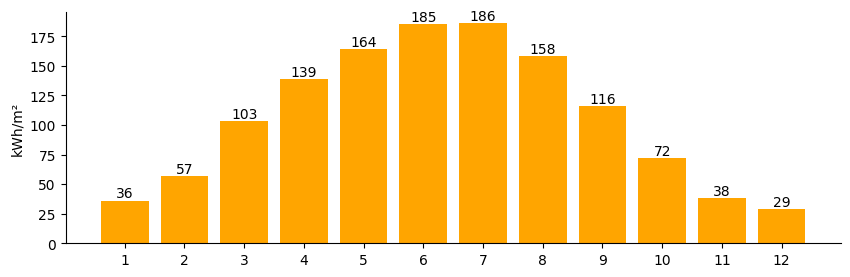

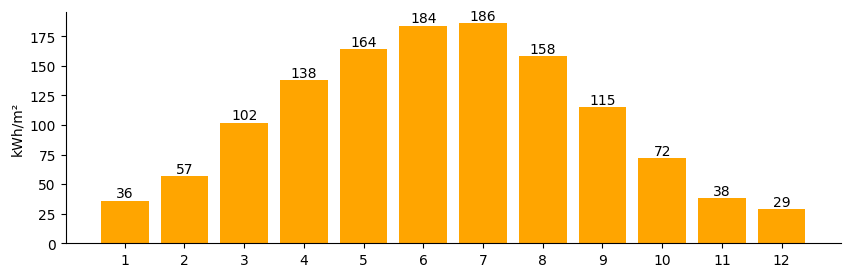

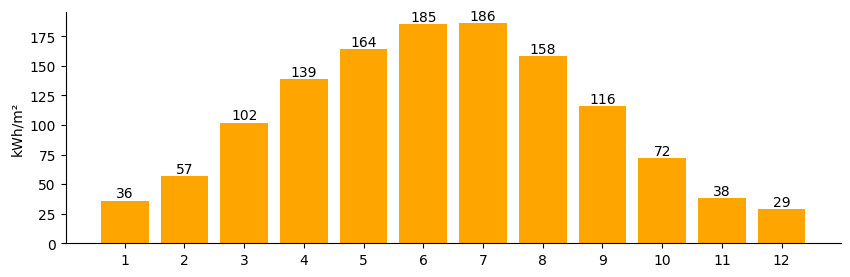

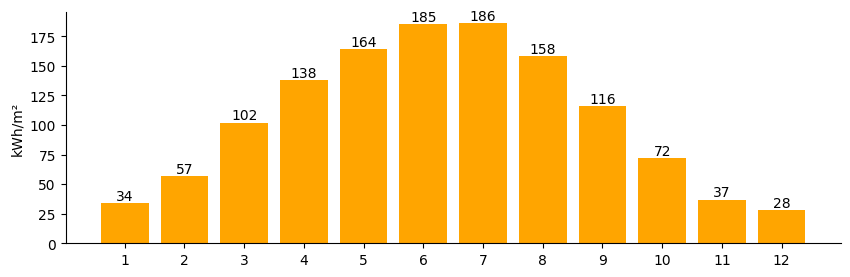

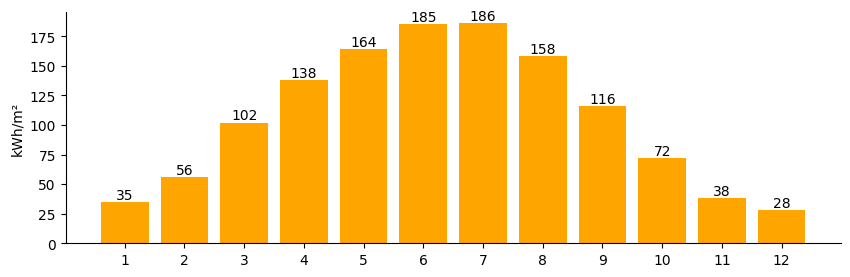

In [110]:
def strahlungplot(i):

  for Id in dfTest['RasterID']:
    values = []
    values = [
    dfTest.loc[i, 'Globalstrahlung_Januar_kWhm2'],
    dfTest.loc[i, 'Globalstrahlung_Februar_kWhm2'],
    dfTest.loc[i, 'Globalstrahlung_Maerz_kWhm2'],
    dfTest.loc[i, 'Globalstrahlung_April_kWhm2'],
    dfTest.loc[i, 'Globalstrahlung_Mai_kWhm2'],
    dfTest.loc[i, 'Globalstrahlung_Juni_kWhm2'],
    dfTest.loc[i, 'Globalstrahlung_Juli_kWhm2'],
    dfTest.loc[i, 'Globalstrahlung_August_kWhm2'],
    dfTest.loc[i, 'Globalstrahlung_September_kWhm2'],
    dfTest.loc[i, 'Globalstrahlung_Oktober_kWhm2'],
    dfTest.loc[i, 'Globalstrahlung_November_kWhm2'],
    dfTest.loc[i, 'Globalstrahlung_Dezember_kWhm2'],
    ]

    i = i + 1

    ax = plt.axes()
    bar = plt.bar(names, values, color= 'orange')
    plt.xticks(names)
    plt.ylabel('kWh/m²')

    #Deaktiviert Rahmen oben und rechts
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.bar_label(bar)

    fig = plt.gcf()
    fig.set_size_inches(10, 3)
    plt.savefig('strahlung' + str(Id) + '.png', dpi=80, bbox_inches='tight',transparent=True)
    plt.show()



strahlungplot(i)


